In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
#plt.style.use('classic')

In [3]:
def readH5Map(filename):
    f = h5py.File(filename,'r')
    data = f['/dataset']
    centerRow = data.attrs['centerRow']
    centerCol = data.attrs['centerCol']
    pixelSize = data.attrs['pixelSize']
    data = data[:]
    f.close()
    return data, centerRow, centerCol, pixelSize

In [4]:
niter = 6
filename = '../testData/190116 3-5 M1 bend%d burst50 morph -FC -CGH Rmod -FC.h5'%0
smap0,centerRow,centerCol,pixelSize = readH5Map(filename)
nrow = smap0.shape[0]
ncol = smap0.shape[1]

In [5]:
smap = np.zeros([niter, nrow, ncol])
for i in range(niter):
    filename = '../testData/190116 3-5 M1 bend%d burst50 morph -FC -CGH Rmod -FC.h5'%i
    smap[i,:,:],centerRow,centerCol,pixelSize = readH5Map(filename)
    print(filename)

../testData/190116 3-5 M1 bend0 burst50 morph -FC -CGH Rmod -FC.h5
../testData/190116 3-5 M1 bend1 burst50 morph -FC -CGH Rmod -FC.h5
../testData/190116 3-5 M1 bend2 burst50 morph -FC -CGH Rmod -FC.h5
../testData/190116 3-5 M1 bend3 burst50 morph -FC -CGH Rmod -FC.h5
../testData/190116 3-5 M1 bend4 burst50 morph -FC -CGH Rmod -FC.h5
../testData/190116 3-5 M1 bend5 burst50 morph -FC -CGH Rmod -FC.h5


Text(0.5, 0.98, 'M1 initial optimization (in microns)')

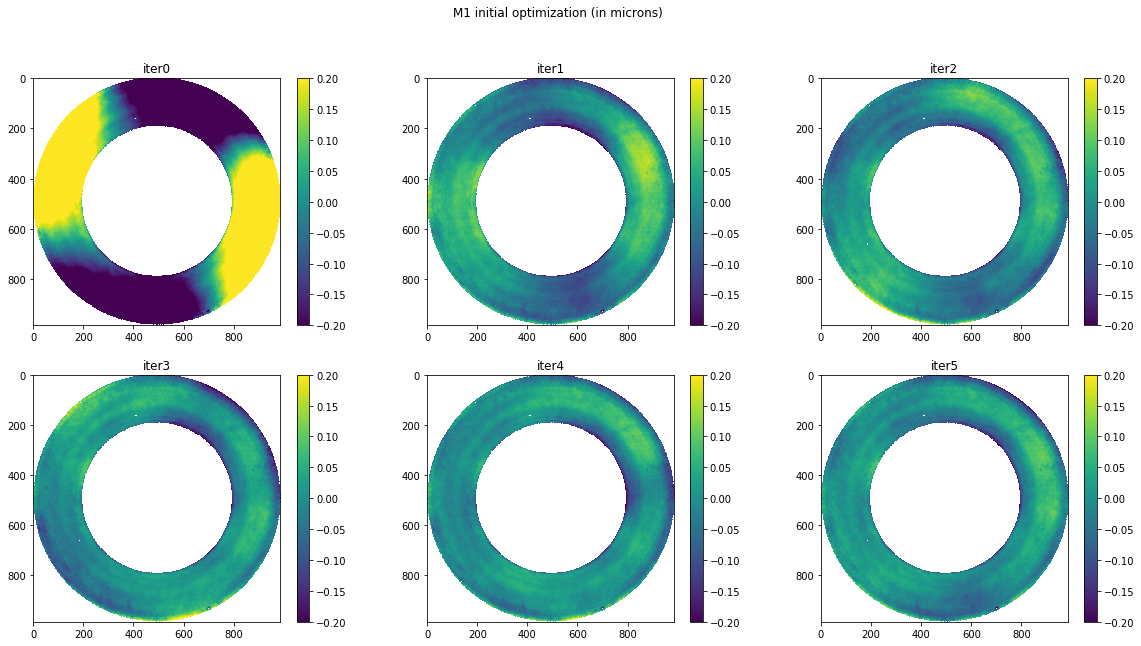

In [6]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for i in range(niter):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    #print(irow, icol)
    img = ax[irow][icol].imshow(smap[i,:,:], vmin=-0.2, vmax=0.2)
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('iter%d'%i)
    
fig.suptitle('M1 initial optimization (in microns)')

In [7]:
srms = np.zeros(niter)
for i in range(niter):
    smapi = smap[i,:,:]
    idx = ~np.isnan(smapi)
    srms[i] = np.std(smapi[idx])

Text(0, 0.5, 'M1 surface RMS (micron)')

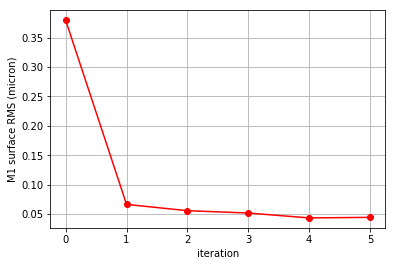

In [8]:
xp = range(niter)
plt.plot(xp, srms,'-ro')
plt.grid()
plt.xlabel('iteration')
plt.ylabel('M1 surface RMS (micron)')

Text(0.5, 0.98, 'predicted surface at the end of each iteration (in microns)')

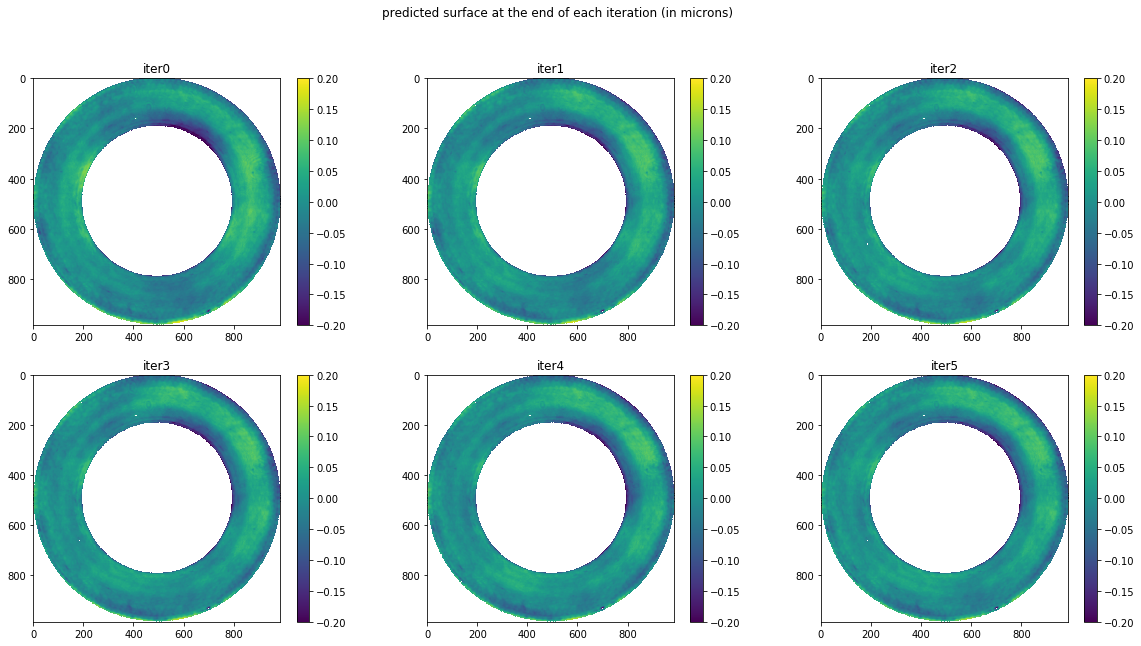

In [9]:
smap = np.zeros([niter, nrow, ncol])
for i in range(niter):
    filename = '../testData/190116 3-5 M1 bend%d burst50 morph -FC -CGH Rmod -FC fit -22modes.h5'%i
    smap[i,:,:],centerRow,centerCol,pixelSize = readH5Map(filename)

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for i in range(niter):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    #print(irow, icol)
    img = ax[irow][icol].imshow(smap[i,:,:], vmin=-0.2, vmax=0.2)
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('iter%d'%i)
    
fig.suptitle('predicted surface at the end of each iteration (in microns)')

In [10]:
import csv
modeAmp = np.zeros([niter, 22])
for i in range(niter):
    filename = '../testData/190116 3-5 M1 bend%d burst50 morph -FC -CGH Rmod -FC fit mode amps.csv'%i
    with open(filename) as f:
        csv_reader = csv.reader(f)
        for row in csv_reader:
            modeAmp[i,np.int(row[0])-1] = np.float(row[1])
    

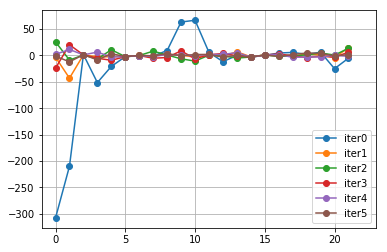

In [11]:
xp = range(22)
for i in range(niter):
    plt.plot(xp, modeAmp[i], '-o', label='iter%d'%i)
plt.xlim(-1, 23)
plt.legend(loc='best')
plt.grid()

In [12]:
#did the temperature change much during those measurements?
import db
engine = db.get_engine()